
# Handling Missing Data in Pandas

Data found in many tutorials often appears clean and well-structured, but real-world data is rarely so neat and homogeneous. Many interesting datasets will have missing values, which adds complexity to data analysis tasks. Additionally, different data sources may indicate missing data in various ways, making it essential to understand how to handle missing data effectively.

In this section, we will:
- Discuss general considerations for missing data.
- Explain how Pandas represents missing data.
- Demonstrate built-in Pandas tools for handling missing data.

## What is Missing Data?

Missing data can arise due to various reasons, such as data entry errors, data collection issues, or merging datasets with different time frames or reporting methods. The most common representations of missing data in Pandas are:
- `None`: A Python singleton object often used for missing data in Python objects like strings or categorical data.
- `NaN`: A special floating-point value that stands for "Not a Number" and is used primarily for missing numerical data.
- `NA`: A new sentinel value introduced in Pandas 1.0 for better handling of missing data across all data types, especially for data types where `NaN` is not applicable.

Pandas provides robust tools to handle these different representations of missing data efficiently.

## Missing Data Conventions

There are several schemes to indicate the presence of missing data in a table or DataFrame, generally revolving around one of two strategies:
1. **Masking Approach**: Uses a separate Boolean array to globally indicate missing values. This mask might involve using one bit in the data representation to indicate the null status of a value.
2. **Sentinel Value Approach**: Uses a special "sentinel" value to indicate a missing entry. This could be a data-specific convention (e.g., using -9999 for missing integers) or a more general one (e.g., `NaN` for missing floating-point values).

### Trade-Offs:
- **Masking Approach**: Requires an additional Boolean array, increasing storage and computational overhead.
- **Sentinel Value Approach**: Reduces the range of valid values that can be represented and may require additional logic for handling operations.

Pandas uses both strategies to balance these trade-offs, providing flexibility and efficiency for different types of data.



## Handling Missing Data in Pandas

Pandas offers several functions to detect, handle, and visualize missing data. Below are some key functions and techniques:

### 1. Detecting Missing Data

Pandas provides functions to identify missing data:


In [1]:
import pandas as pd
import numpy as np

# Example DataFrame with missing values
data = {
    'A': [1, 2, np.nan, 4],
    'B': [5, np.nan, np.nan, 8],
    'C': ['a', 'b', None, 'd']
}

df = pd.DataFrame(data)
df

,A,B,C
0,1.0,5.0,a
1,2.0,NaN,b
2,NaN,NaN,None
3,4.0,8.0,d


Detect missing values:

In [2]:
df.isnull()

,A,B,C
0,False,False,False
1,False,True,False
2,True,True,True
3,False,False,False


Count missing values in each column:

In [4]:
df.isnull().sum()

,0
A,1
B,2
C,1



### 2. Dropping Missing Data

Sometimes, it may be appropriate to drop rows or columns containing missing values:


In [5]:
# Drop rows with any missing values
df.dropna()

,A,B,C
0,1.0,5.0,a
3,4.0,8.0,d


In [6]:
# Drop columns with any missing values
df.dropna(axis='columns')

""
0
1
2
3


In [7]:
# Drop rows where all elements are missing
df.dropna(how='all')

,A,B,C
0,1.0,5.0,a
1,2.0,NaN,b
3,4.0,8.0,d


In [8]:
# Drop rows where n elements are non-missing
df.dropna(thresh=2)  # Require that many non-NA values. Cannot be combined with how.

,A,B,C
0,1.0,5.0,a
1,2.0,NaN,b
3,4.0,8.0,d



### 3. Filling Missing Data

In other cases, it might be more useful to fill missing values with specific values or computed statistics:


In [9]:
# Fill missing values with a specific value
df.fillna(0)

,A,B,C
0,1.0,5.0,a
1,2.0,0.0,b
2,0.0,0.0,0
3,4.0,8.0,d


In [10]:
# Fill missing values with the mean of the column
df.fillna(df.mean(numeric_only=True))

,A,B,C
0,1.000000,5.0,a
1,2.000000,6.5,b
2,2.333333,6.5,None
3,4.000000,8.0,d


In [11]:
# Forward fill (propagate the last valid observation forward)
df.ffill()

,A,B,C
0,1.0,5.0,a
1,2.0,5.0,b
2,2.0,5.0,b
3,4.0,8.0,d


In [12]:
# Backward fill (propagate the next valid observation backward)
df.bfill()

,A,B,C
0,1.0,5.0,a
1,2.0,8.0,b
2,4.0,8.0,d
3,4.0,8.0,d



### 4. Interpolating Missing Data

For some datasets, interpolating missing values can be more appropriate. Pandas provides an `interpolate` method to perform linear or other types of interpolation:


In [16]:
# Linear interpolation
df[['A', 'B']].interpolate()

,A,B
0,1.0,5.0
1,2.0,6.0
2,3.0,7.0
3,4.0,8.0


### 5. Advanced Missing Data Handling with `pd.NA`

Pandas 1.0, released in January 2020, introduced the `pd.NA` scalar for better handling of missing values across different data types. This addition provides a more consistent and flexible approach to handling missing data in Pandas compared to the traditional `NaN` (Not a Number) representation, which is primarily limited to floating-point numbers.

#### Key Differences Between `pd.NA` and `NaN`:

- **Consistency Across Data Types**: `pd.NA` works across all data types (integers, floats, strings, booleans, etc.), while `NaN` is specifically a floating-point value and does not work well with non-float data types.
  
- **Nullable Data Types**: With `pd.NA`, Pandas introduces nullable data types (`Int64`, `boolean`, `StringDtype`, etc.) that handle missing values without needing to upcast columns to `float` or `object`. In contrast, using `NaN` forces upcasting, which can lead to loss of efficiency and precision.

- **Logical Operations**: Operations with `pd.NA` follow three-valued logic (True, False, Unknown), providing more intuitive behavior when dealing with missing values. In comparison, `NaN` can yield less intuitive results, especially in logical expressions.

- **Unified Handling of Missing Data**: `pd.NA` provides a uniform representation for missing values in all data types, reducing ambiguity and making data manipulation cleaner and more predictable. `NaN` is limited in its ability to represent missing data in non-numeric columns like strings or booleans.

By leveraging `pd.NA`, you can handle missing data more robustly and efficiently in your data analysis workflows. Below are examples demonstrating how to use `pd.NA` in a Pandas DataFrame.


In [33]:
# Using pd.NA for missing values
df['D'] = pd.Series([1, pd.NA, 3, pd.NA], dtype='Int64')
df.info()  # Output: Int64 (Nullable Integer Type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      float64
 1   B       2 non-null      float64
 2   C       3 non-null      object 
 3   D       2 non-null      Int64  
dtypes: Int64(1), float64(2), object(1)
memory usage: 260.0+ bytes


In [34]:
# Operations with pd.NA
df['D'] = df['D'].fillna(0)  # Example of filling with 0
df['D']

,D
0,1
1,0
2,3
3,0


### 6. The Contagious Nature of Missing Data

In data analytics, missing data can propagate through calculations, affecting the results. This phenomenon is often referred to as the "contagious" nature of missing data. Understanding how missing values influence computations is crucial for accurate data analysis.

#### Stand-alone Examples

When performing arithmetic operations with missing values (`np.nan`), the result is typically also missing.

In [41]:
# Addition
result = 1 + np.nan
print("1 + np.nan =", result)

# Multiplication
result = 5 * np.nan
print("5 * np.nan =", result)

# Comparison
print("np.nan == np.nan:", np.nan == np.nan)

1 + np.nan = nan
5 * np.nan = nan
np.nan == np.nan: False


These examples demonstrate that any operation involving a missing value results in a missing or undefined outcome.

#### Example in a DataFrame

Missing data can contaminate entire computations within a DataFrame.

In [42]:
# Create a simple DataFrame with missing values
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4],
    'B': [5, np.nan, 7, 8]
})

print("Original DataFrame:")
print(df)

Original DataFrame:
     A    B
0  1.0  5.0
1  2.0  NaN
2  NaN  7.0
3  4.0  8.0


Compute a new column `C` as the sum of columns `A` and `B`:

In [43]:
df['C'] = df['A'] + df['B']
print("\nDataFrame after adding column C (A + B):")
df


DataFrame after adding column C (A + B):


,A,B,C
0,1.0,5.0,6.0
1,2.0,NaN,NaN
2,NaN,7.0,NaN
3,4.0,8.0,12.0


In rows where either `A` or `B` is missing, the result in `C` is also missing. The missing values have "contaminated" the computation.


### 7. Visualizing Missing Data with `missingno`

The `missingno` package is a Python library that provides a simple and easy way to visualize missing data in datasets. Understanding the pattern of missing data is crucial for making informed decisions on how to handle it.

#### Installing `missingno`

```bash
pip install missingno
```

#### Visualizing Missing Data

The `missingno` package provides several visualization functions to understand the distribution and patterns of missing values:

1. **Bar Plot**: Shows a simple visualization of the count of non-missing values per column.
2. **Matrix Plot**: Displays a data matrix where missing values are marked.
3. **Heatmap**: Displays a correlation heatmap of the nullity of the dataset.
4. **Dendrogram**: Displays a dendrogram of missing data, useful for identifying patterns in missing data.

Below are examples of how to use these visualizations:

In [36]:
# Sample dataset
df_grocery = pd.DataFrame({
    'CustomerID': [f'CUST_{str(i).zfill(3)}' for i in range(1, 21)],
    'PurchaseDate': np.random.choice(pd.to_datetime(['2024-09-17', '2024-09-18', '2024-09-19']), 20),
    'Product': ['Milk', 'Bread', pd.NA, 'Cheese', 'Butter', 'Milk', 'Bananas', 'Tomatoes',
                'Beef', 'Rice', 'Pasta', 'Tomatoes', 'Onions', 'Potatoes', 'Carrots',
                'Lettuce', 'Cereal', 'Juice', 'Yogurt', 'Milk'],
    'Quantity': np.random.choice([1, 2, 3, np.nan], 20),
    'UnitPrice': [3.5, 2.0, 0.2, 5.0, 4.0, 3.5, 0.3, 0.8, 8.0, 1.0,
                  1.5, 0.8, 0.6, 0.4, 0.3, 1.2, 3.0, 2.5, 0.9, 3.5]
})

df_grocery['TotalAmount'] = df_grocery['Quantity'] * df_grocery['UnitPrice']

df_grocery.head(2)

,CustomerID,PurchaseDate,Product,Quantity,UnitPrice,TotalAmount
0,CUST_001,2024-09-19,Milk,NaN,3.5,NaN
1,CUST_002,2024-09-18,Bread,NaN,2.0,NaN


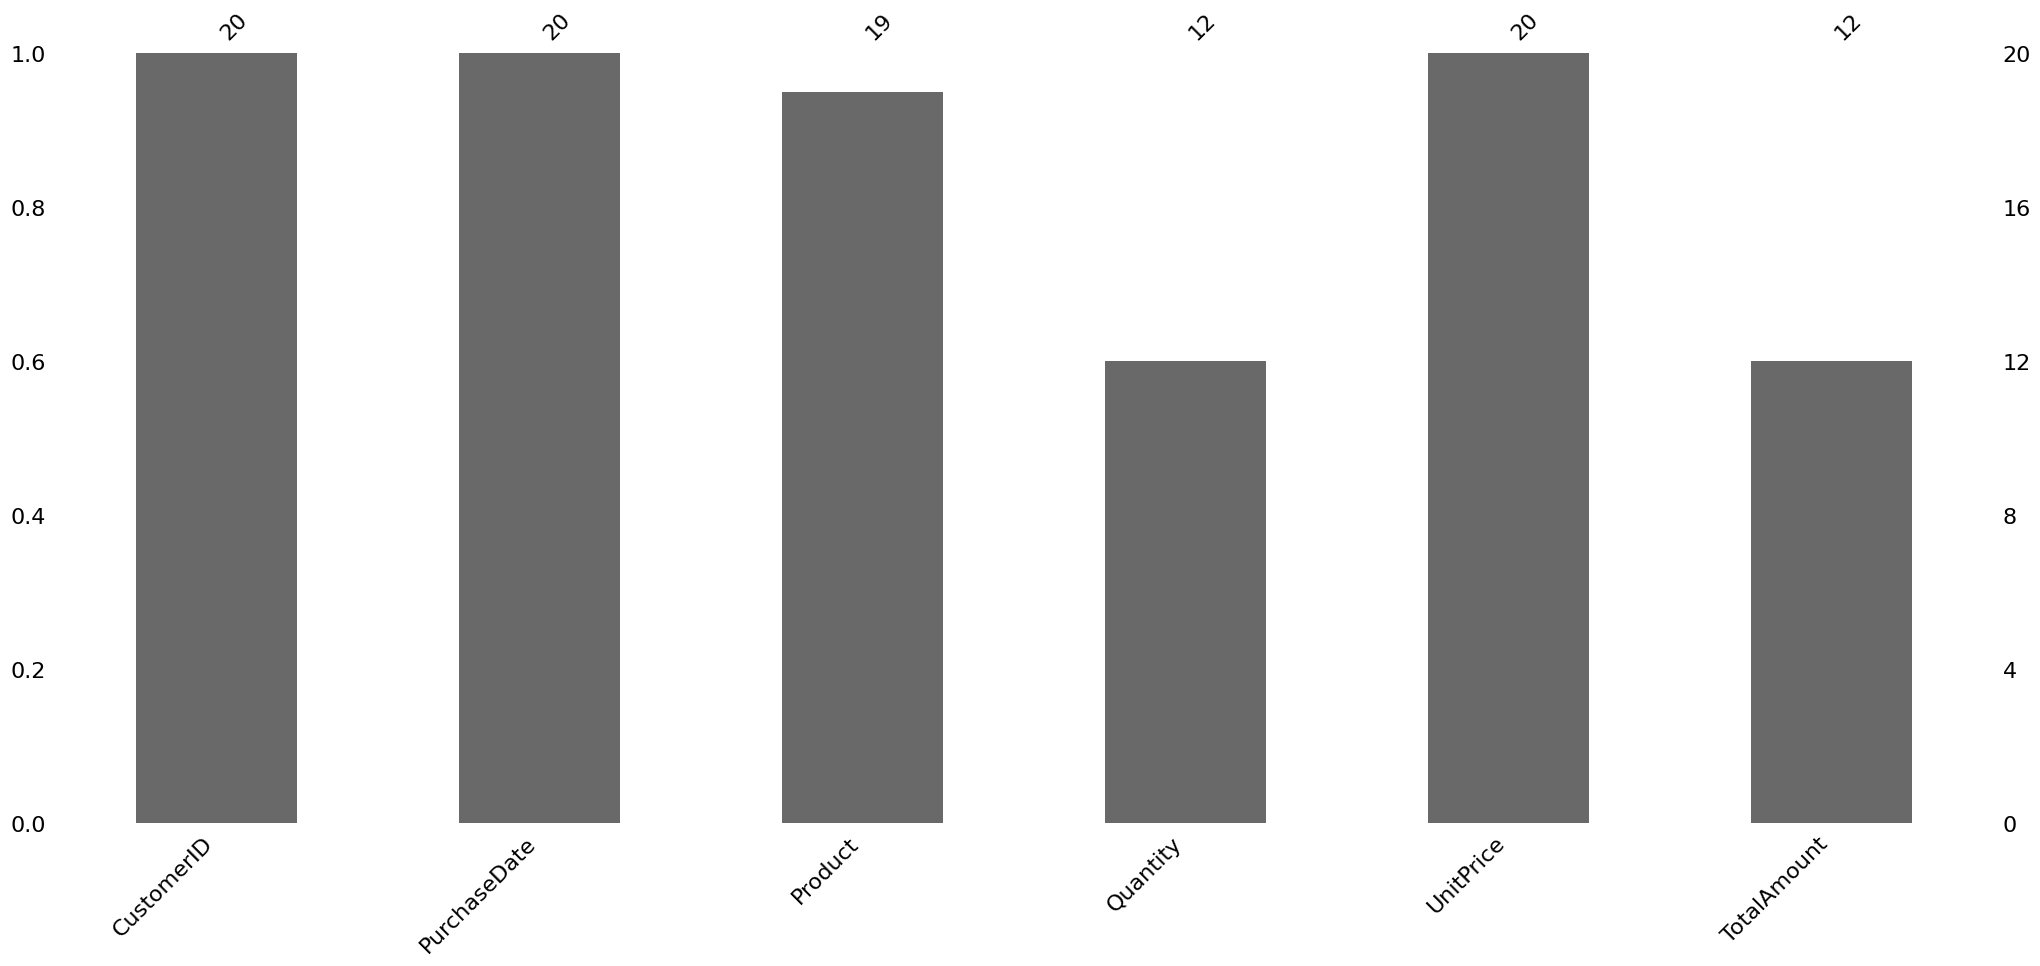

In [37]:
import missingno as msno

# Visualize missing data with a bar plot
msno.bar(df_grocery);

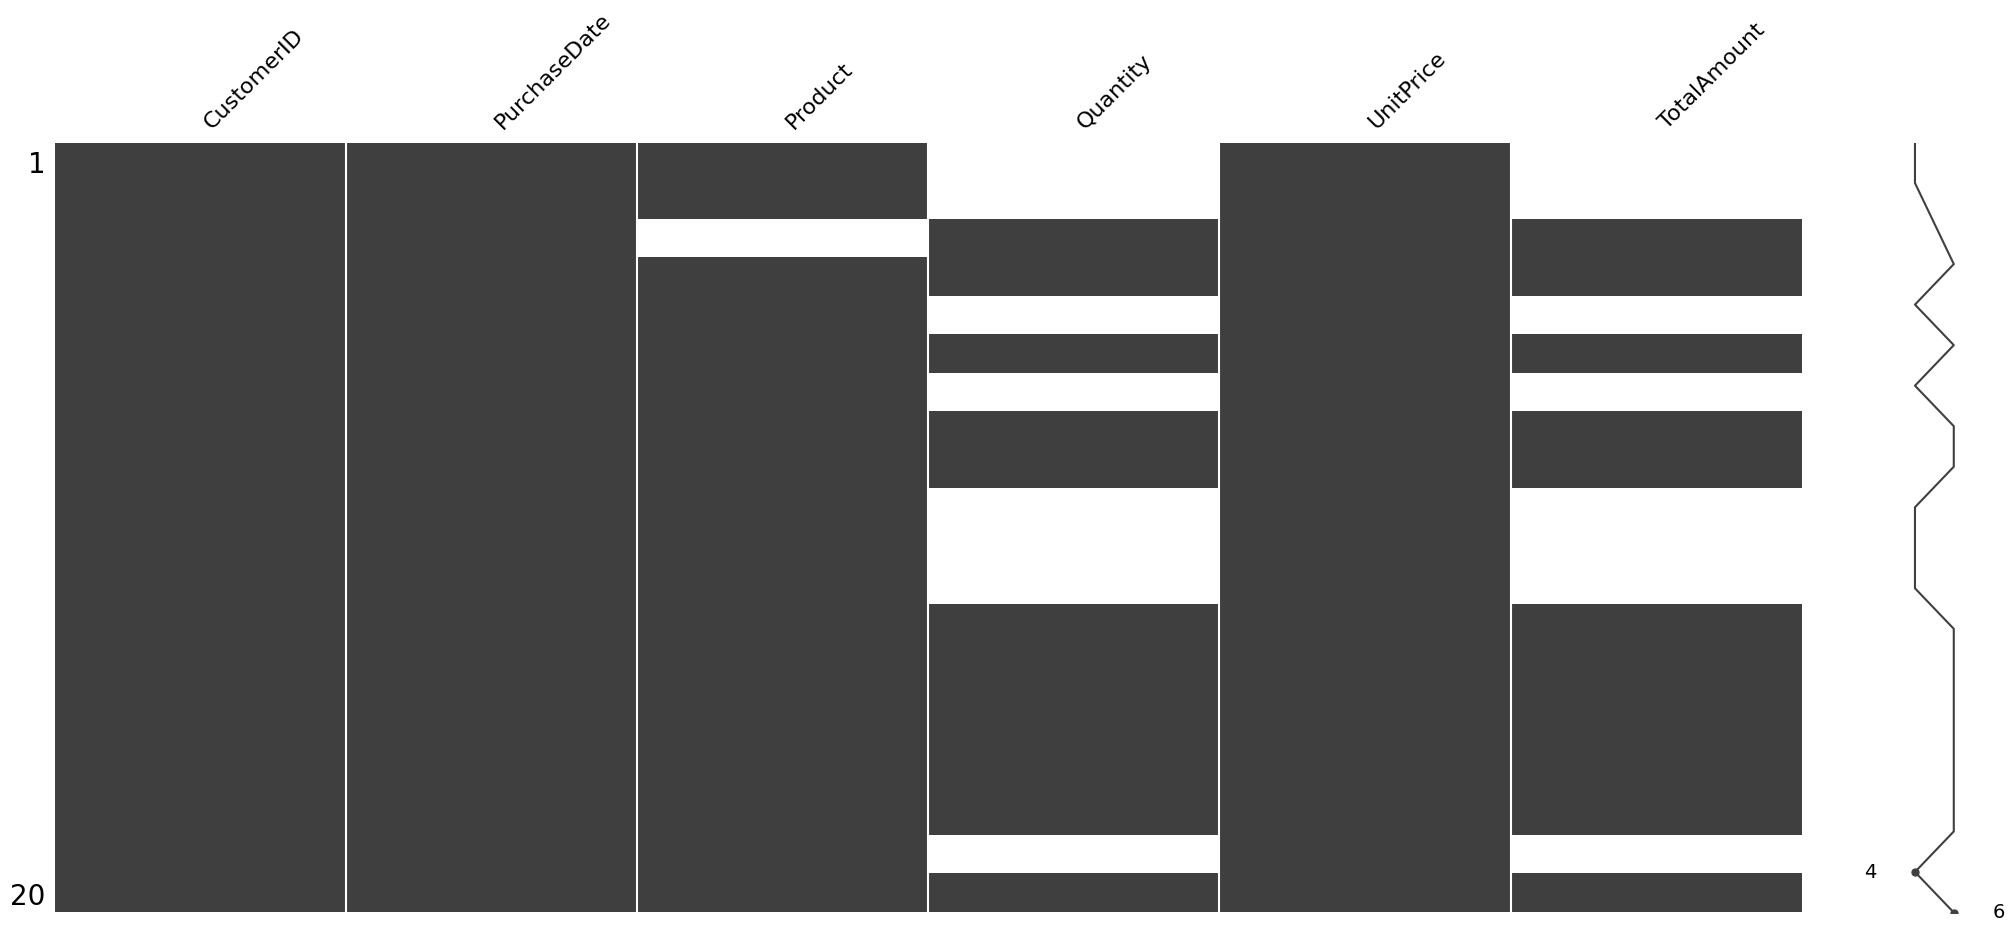

In [38]:
# Visualize missing data with a matrix plot
msno.matrix(df_grocery);

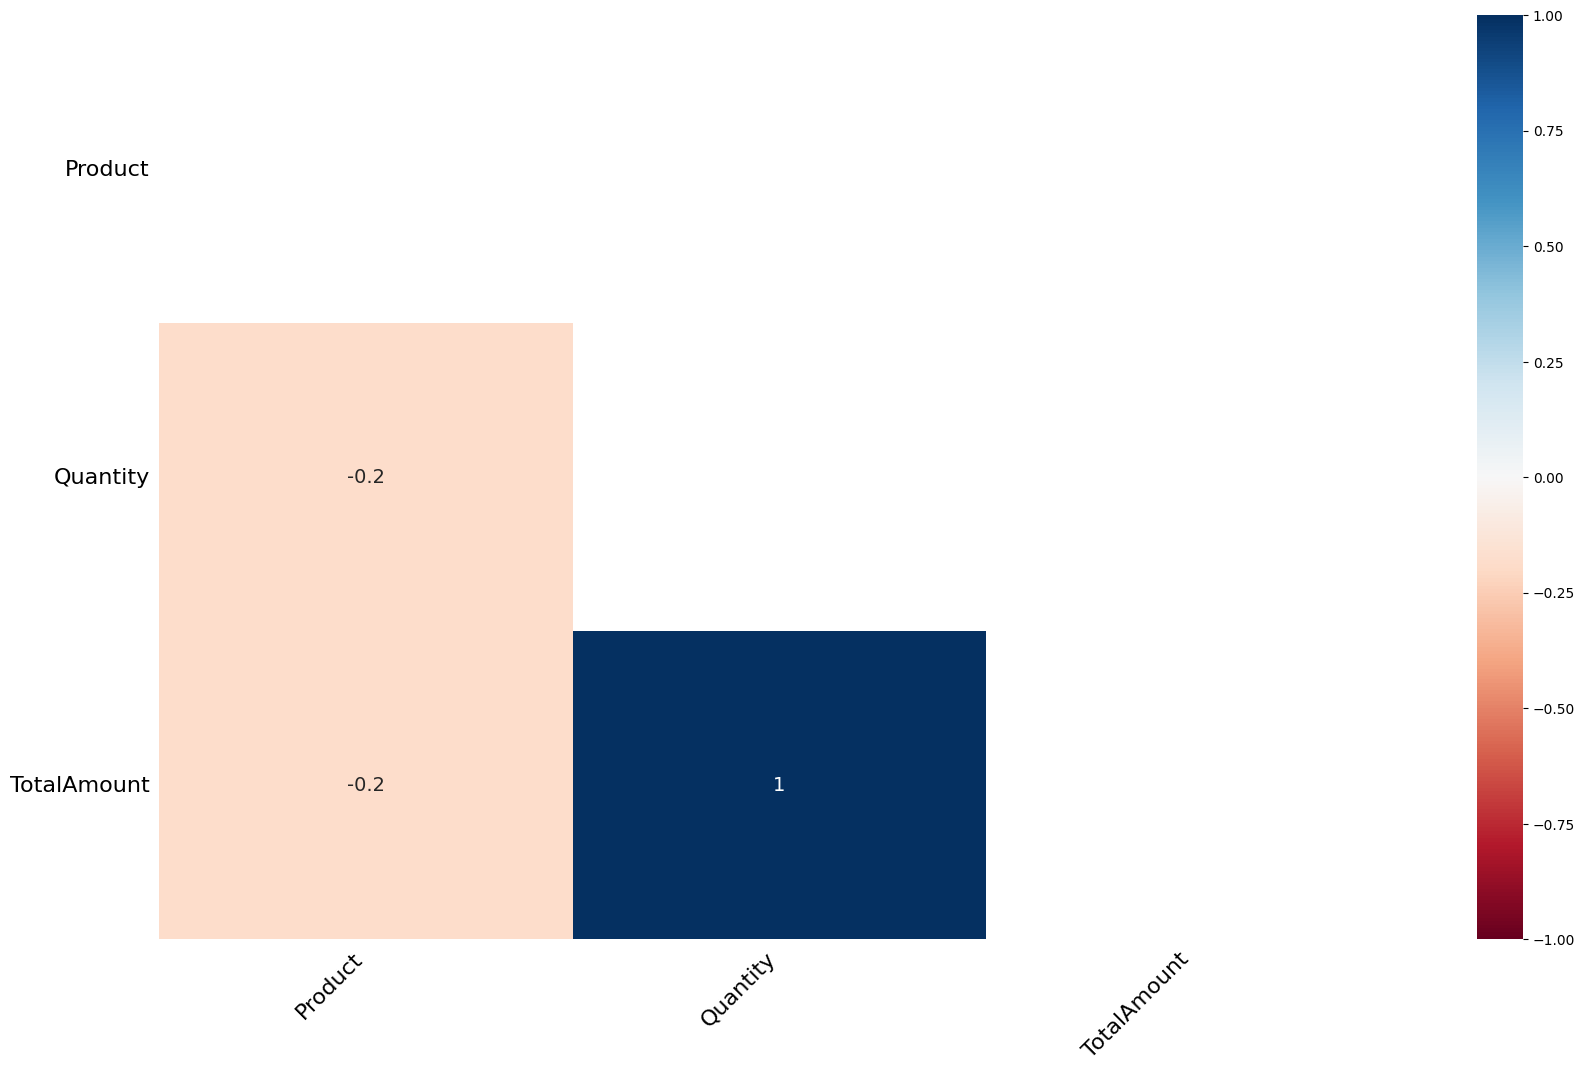

In [39]:
# Visualize missing data with a heatmap to see correlations of missing values
msno.heatmap(df_grocery);

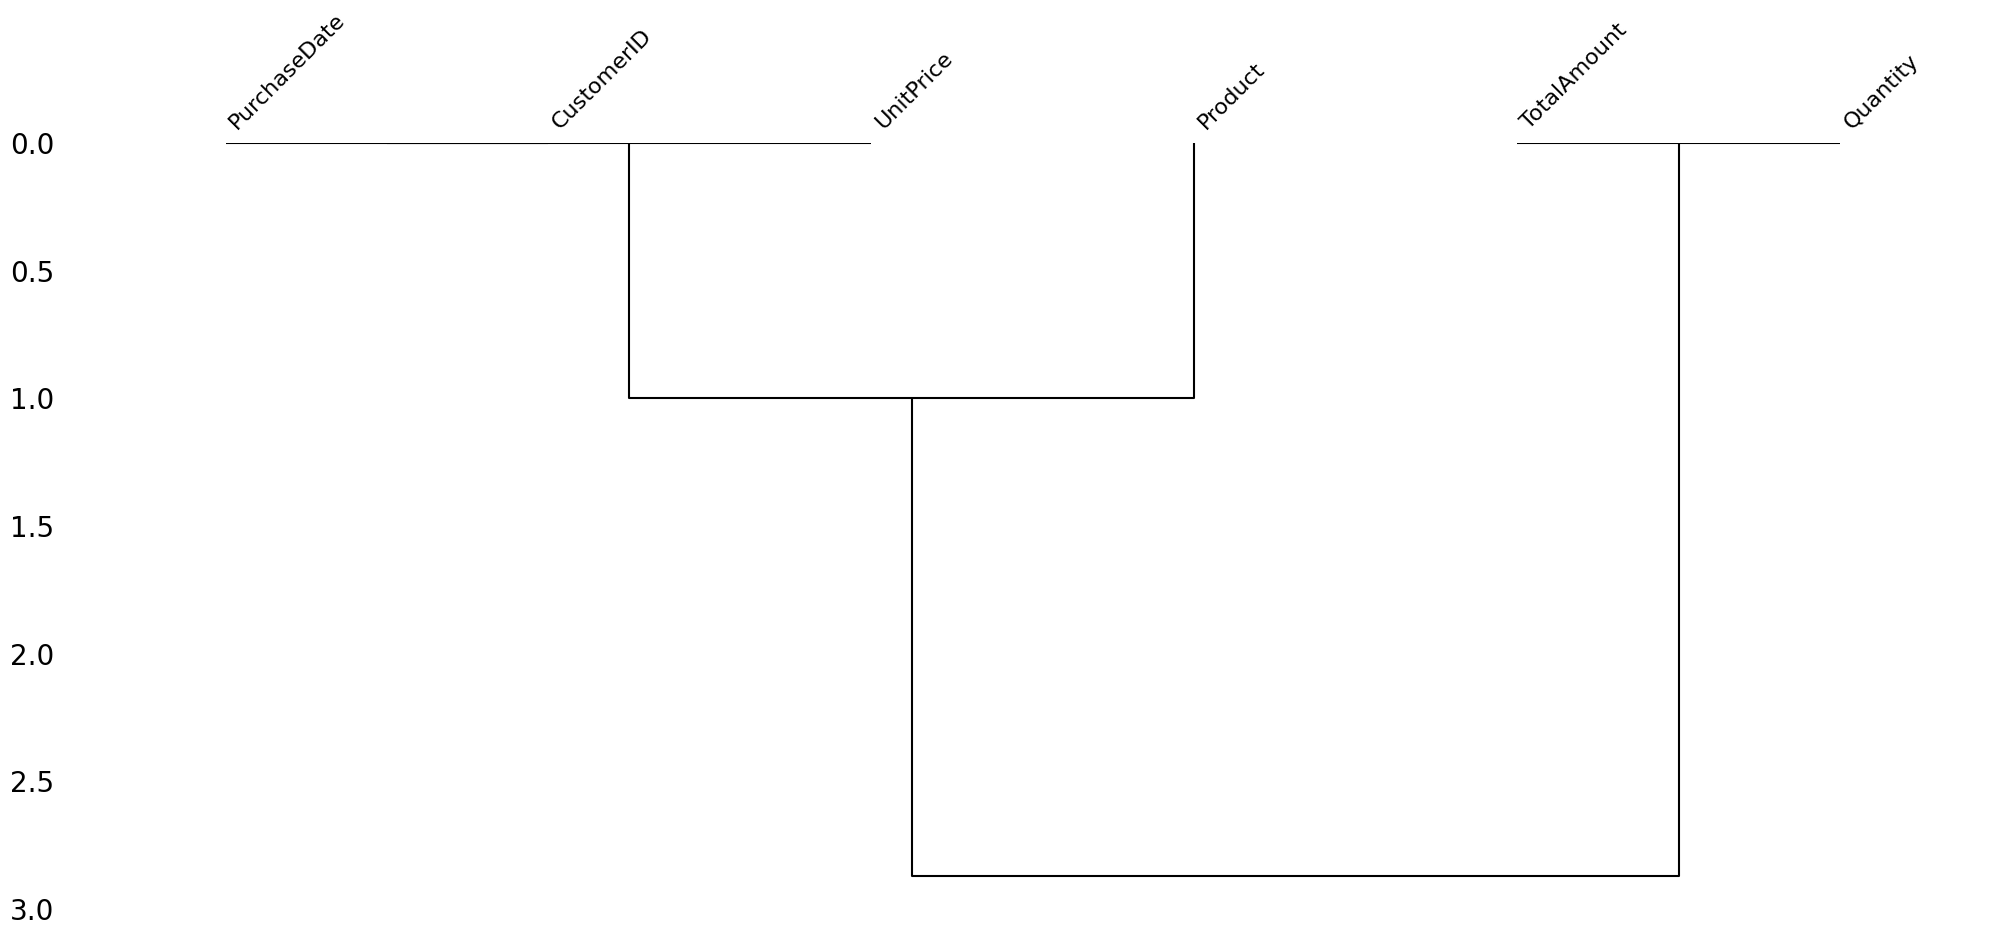

In [40]:
# Visualize missing data with a dendrogram
msno.dendrogram(df_grocery);


### Summary

Handling missing data is a critical skill in data analytics. Understanding the trade-offs and different methods to handle missing values allows for more robust and meaningful data analysis. Pandas provides a comprehensive set of tools that balance flexibility, efficiency, and ease of use to handle missing data in various scenarios.
